In [1]:
# Prime the dataset
import pandas as pd
import numpy as np
import ipywidgets as widgets
import random 
from matplotlib import pyplot as plt

# Sklearn packages
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso, Ridge

import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
df = pd.read_csv('48_Industry_Portfolios_daily.csv', sep=',', skiprows = 9, skipfooter = 1)
df = df.rename(columns={'Unnamed: 0': 'Date'})

# Select rows for Average Value Weighted Returns -- Daily ONLY 
null_columns = df.columns[df.isnull().any()]
row_num = df[df.isnull().any(axis=1)][null_columns].head().index[0]
df = df.iloc[:row_num] # Select rows for Average Value Weighted Returns -- Daily ONLY 
df.head()

,Date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,19260701,0.56,-0.07,-99.99,-1.39,0.00,-1.44,0.62,-1.27,-0.90,...,-0.93,0.15,2.77,-0.02,0.27,0.59,0.47,0.81,0.69,-1.66
1,19260702,0.29,0.06,-99.99,0.78,0.70,1.46,0.03,0.00,-0.34,...,1.07,0.06,0.00,0.01,-0.10,1.04,-0.03,-0.61,-0.45,3.09
2,19260706,-0.33,0.18,-99.99,-1.74,0.50,-0.96,-0.06,4.27,-1.20,...,0.73,-0.19,0.77,-0.22,-0.67,0.45,0.31,-0.72,0.04,1.41
3,19260707,3.57,-0.15,-99.99,-1.73,-0.12,-0.49,-0.06,-4.10,-0.22,...,2.22,0.18,-3.21,-0.57,-0.70,-1.09,0.21,0.07,-0.40,0.62
4,19260708,0.30,1.12,-99.99,-0.15,0.30,-0.49,0.24,0.00,-0.01,...,-0.39,0.46,-1.10,-0.38,0.33,0.99,-0.88,-0.36,-0.93,0.98


In [3]:
# Converting to the right data type 
df['Date'] = pd.to_datetime(df['Date'], format="%Y%m%d")
df.iloc[:,1:] = df.iloc[:,1:].astype('float')
df.dtypes
df.head()

,Date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,1926-07-01,0.56,-0.07,-99.99,-1.39,0.00,-1.44,0.62,-1.27,-0.90,...,-0.93,0.15,2.77,-0.02,0.27,0.59,0.47,0.81,0.69,-1.66
1,1926-07-02,0.29,0.06,-99.99,0.78,0.70,1.46,0.03,0.00,-0.34,...,1.07,0.06,0.00,0.01,-0.10,1.04,-0.03,-0.61,-0.45,3.09
2,1926-07-06,-0.33,0.18,-99.99,-1.74,0.50,-0.96,-0.06,4.27,-1.20,...,0.73,-0.19,0.77,-0.22,-0.67,0.45,0.31,-0.72,0.04,1.41
3,1926-07-07,3.57,-0.15,-99.99,-1.73,-0.12,-0.49,-0.06,-4.10,-0.22,...,2.22,0.18,-3.21,-0.57,-0.70,-1.09,0.21,0.07,-0.40,0.62
4,1926-07-08,0.30,1.12,-99.99,-0.15,0.30,-0.49,0.24,0.00,-0.01,...,-0.39,0.46,-1.10,-0.38,0.33,0.99,-0.88,-0.36,-0.93,0.98


In [4]:
# Checking of data integrity 
print(df.iloc[24895:24896,0:7])

            Date  Agric  Food   Soda   Beer   Smoke  Toys 
24895 2020-12-31   0.71   0.65    0.9   0.57   1.24  -1.48


In [5]:
df = df.set_index("Date")
# Remove white space 
df.columns = [item.strip() for item in df.columns]
df.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-01,0.56,-0.07,-99.99,-1.39,0.00,-1.44,0.62,-1.27,-0.90,0.12,...,-0.93,0.15,2.77,-0.02,0.27,0.59,0.47,0.81,0.69,-1.66
1926-07-02,0.29,0.06,-99.99,0.78,0.70,1.46,0.03,0.00,-0.34,-0.35,...,1.07,0.06,0.00,0.01,-0.10,1.04,-0.03,-0.61,-0.45,3.09
1926-07-06,-0.33,0.18,-99.99,-1.74,0.50,-0.96,-0.06,4.27,-1.20,0.41,...,0.73,-0.19,0.77,-0.22,-0.67,0.45,0.31,-0.72,0.04,1.41
1926-07-07,3.57,-0.15,-99.99,-1.73,-0.12,-0.49,-0.06,-4.10,-0.22,0.16,...,2.22,0.18,-3.21,-0.57,-0.70,-1.09,0.21,0.07,-0.40,0.62
1926-07-08,0.30,1.12,-99.99,-0.15,0.30,-0.49,0.24,0.00,-0.01,0.79,...,-0.39,0.46,-1.10,-0.38,0.33,0.99,-0.88,-0.36,-0.93,0.98


In [6]:
# Data Check - Min Var & Returns # TO BE REMOVED 

train_start_date = 24833 # datetime.date(2020,12,31)
test_start_date = 24896 # datetime.date(2021,1,4)
last_date = 25019 # datetime.date(2021,6,30)

# First 6 industries 
training_data = df.iloc[train_start_date:test_start_date,:6] 

p = len(training_data.columns)
W_ew = np.full(p,1/p).reshape(p,1)
# print(W_ew)

Identity_mat = np.identity(p-1)
minus1T = np.negative(np.ones(p-1))
N = np.vstack((Identity_mat,minus1T))
# print(N)

R = training_data - training_data.mean()
# print(R)
R.shape

y = R.dot(W_ew) # 63 x 6 . 6 x 1
X = R.dot(N) # 63 x 6 . 6 x 5

reg = LinearRegression()
reg.fit(X, y)

betas = reg.coef_.T
MinVar_Weight = W_ew - N.dot(betas) # 6 x 5 . 5 x 1
print(MinVar_Weight) # Min Portfolio on 2020-12-31 for first 6 industries 

test_data = df.iloc[test_start_date,:6]
MinVar_return = test_data.dot(MinVar_Weight)[0] # Returns x Min Portfolio
print(MinVar_return)

[[-0.0288326 ]
 [ 0.54214153]
 [ 0.26115067]
 [ 0.06721388]
 [ 0.08083744]
 [ 0.07748909]]
-1.8856306966850025


In [7]:
# Using Linear Regression (OLS) - to see overfitting 

def portfolio_var(number):
    train_start_date = 24833 # datetime.date(2020,12,31)
    test_start_date = 24896 # datetime.date(2021,1,4)
    last_date = 25019 # datetime.date(2021,6,30)

    train_data_var = []
    test_data_return = []

    # Generate random sample to choose industries 
    random.seed(124)                 
    sample = random.sample(range(0, 48), number)

    while test_start_date <= last_date:
        training_data = df.iloc[train_start_date:test_start_date,sample]

        p = len(training_data.columns)
        W_ew = np.full(p,1/p).reshape(p,1)

        Identity_mat = np.identity(p-1)
        minus1T = np.negative(np.ones(p-1))
        N = np.vstack((Identity_mat,minus1T))

        R = training_data - training_data.mean()
        R.shape

        y = R.dot(W_ew) 
        X = R.dot(N) 

        reg = LinearRegression()
        reg.fit(X, y)

        betas = reg.coef_.reshape(-1,1)
        MinVar_Weight = W_ew - N.dot(betas)
        
        test_data = df.iloc[test_start_date,sample]
        MinVar_return = test_data.dot(MinVar_Weight)[0]
        test_data_return.append(MinVar_return) # Min Var return for each test data 

        R_array = R.to_numpy()
        train_data_returns = R_array.dot(MinVar_Weight)
        train_data_var.append((train_data_returns).var()) # Var over the past 63 observations

        train_start_date += 1
        test_start_date += 1

    df_test = df.iloc[24896:,sample]
    df_test['test_returns'] = test_data_return
    df_test['train_var'] = train_data_var

    test_variance = df_test.loc[:,"test_returns"].var() # test variance 
    train_variance = df_test.loc[:,"train_var"].mean() # mean train variance

    industries = training_data.columns.to_list()

    print(df_test.head())
    print("The number of industries:",number)
    print("The industries are", industries)
    print("The average train data variance is:", train_variance)
    print("The test data variance is:", test_variance)

In [8]:
portfolio_var(6)

            Cnstr  Chips  Agric  MedEq  Beer  Gold  test_returns  train_var
Date                                                                       
2021-01-04  -2.26  -1.85  -0.95  -1.15 -2.28  5.41     -1.760866   0.814687
2021-01-05   0.06   1.47   1.06   1.17  0.39  0.58      0.638032   0.848947
2021-01-06   2.89  -1.92   5.59   0.70 -0.28  2.54      0.775740   0.846733
2021-01-07   2.85   3.42   1.64   0.87  0.29 -0.31      0.678781   0.815506
2021-01-08  -2.60   0.42   2.89   0.77  0.95 -4.48      0.275861   0.792448
The number of industries: 6
The industries are ['Cnstr', 'Chips', 'Agric', 'MedEq', 'Beer', 'Gold']
The average train data variance is: 0.7233348039759983
The test data variance is: 0.784736014744168


In [51]:
# LASSO - REBUILT
def lasso_result(number):
    train_start_date = 24833 # datetime.date(2020,12,31)
    test_start_date = 24896 # datetime.date(2021,1,4)
    last_date = 25019 # datetime.date(2021,6,30)
    wt_data = np.empty((0,number),int)
    W_ew = np.full(number,1/number).reshape(number,1)
    
    exp_return_array_lasso = []
    ts_MEAN = []
    ts_VAR = []
    MSE = []
    alpha_used = []
    std_error= []

    # Generate random sample to choose industries 
    random.seed(123)                 
    sample = random.sample(range(0, 48), number)





    

    while test_start_date <= last_date:

        training_data = df.iloc[train_start_date:test_start_date,sample] 

        # Create N
        Identity_mat = np.identity(number-1)
        minus1T = np.negative(np.ones(number-1))
        N = np.vstack((Identity_mat,minus1T))

        # Create R
        R_train = training_data - training_data.mean()

        # Create X and Y variables
        X_train = R_train.dot(N) # 63 x 6 . 6 x 5
        y_train = R_train.dot(W_ew) # 63 x 6 . 6 x 1

        #Lasso
        lasso = LassoCV(cv = 10, random_state=0, fit_intercept = False,n_alphas=300)
        lasso.fit(X_train,y_train)

        #beta coef    
        betas = (lasso.coef_).reshape(-1,1)

        #weights
        weights = W_ew - (N.dot(betas))
        wt_data = np.vstack((wt_data, weights.reshape(1,-1)))
        
        #training set
        ts = np.dot(R_train, weights) #63 x 1
        ts_var = np.var(ts)
        ts_VAR.append(ts_var)
            
        #appending MSE and n_alphas 
        MSE.append(lasso.mse_path_)
        alpha_used.append(lasso.alphas_)

        #test set
        test_data = df.iloc[test_start_date,sample]

        #expected return array
        returns = (test_data.dot(weights))
        exp_return_array_lasso.append(returns[0])
            
        #loop
        train_start_date += 1
        test_start_date += 1

        #creating a DF to calculate mean and variance
        df_test = df.iloc[test_start_date:,sample]


    print("Mean train Variance:", np.mean(ts_VAR))
    print("Test Variance:", np.var(exp_return_array_lasso))
    print("Test Mean:", np.mean(exp_return_array_lasso), '\n')
    
    

    #calculate error for each alpha on a given test date
    #tdi refers to which date we choose to use where 0=2021-01-04 and 123=2021-6-30
    tdi = 0
    min_Errors = []
    for alpha in range(300):
        min_error = np.mean(MSE[tdi][alpha])
        se = np.std(MSE[tdi][alpha])
        min_Errors.append(min_error)
        std_error.append(se) 
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(1,1,1)
    ax.plot(np.log(alpha_used[tdi]), min_Errors)

    std_error = std_error / np.sqrt(10)
        
    plt.title("Bias-Variance Tradeoff for Lasso with {0} Industries".format(number),fontsize=15)
    plt.plot(np.log(alpha_used[tdi]), min_Errors + std_error, 'r--')
    plt.plot(np.log(alpha_used[tdi]), min_Errors - std_error, 'r--')
    ax.fill_between(np.log(alpha_used[tdi]), min_Errors + std_error, min_Errors - std_error, alpha=0.25)
        
        
    ax.set_ylabel('Mean-Squared Errors',fontsize=20)
    ax.set_xlabel('log(Lambda)',fontsize=20)
    ax.axhline(np.max(min_Errors), linestyle='--', color='.5')
    ax.set_xlim([np.log(alpha_used[tdi])[-1], np.log(alpha_used[tdi])[0]])
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.show()
    
    

    industries = training_data.columns.to_list()
    print("The industries are", industries)
    print("The optimal log(lambda) is:", np.log(alpha_used[0][np.argmin(min_Errors)]))
    print(len(alpha_used))

Mean train Variance: 0.6944929872333275
Test Variance: 0.8504782589166153
Test Mean: 0.0947943914900174 



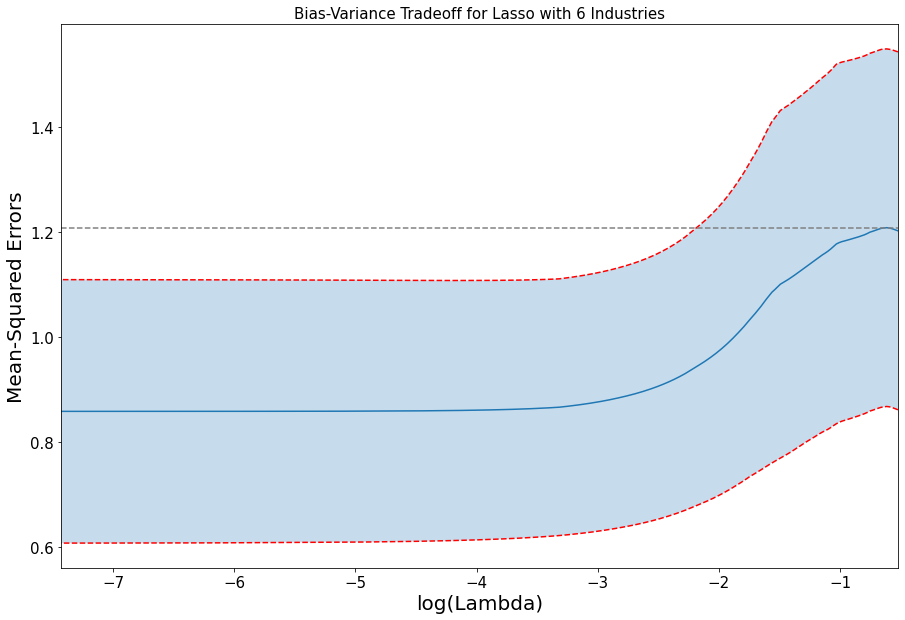

The industries are ['Beer', 'Cnstr', 'Toys', 'Gold', 'Fin', 'Fun']
The optimal log(lambda) is: -7.407156444365013
124


In [52]:
lasso_result(6)

Mean train Variance: 0.4166821174252263
Test Variance: 0.6301327283947334
Test Mean: 0.09437662866610129 



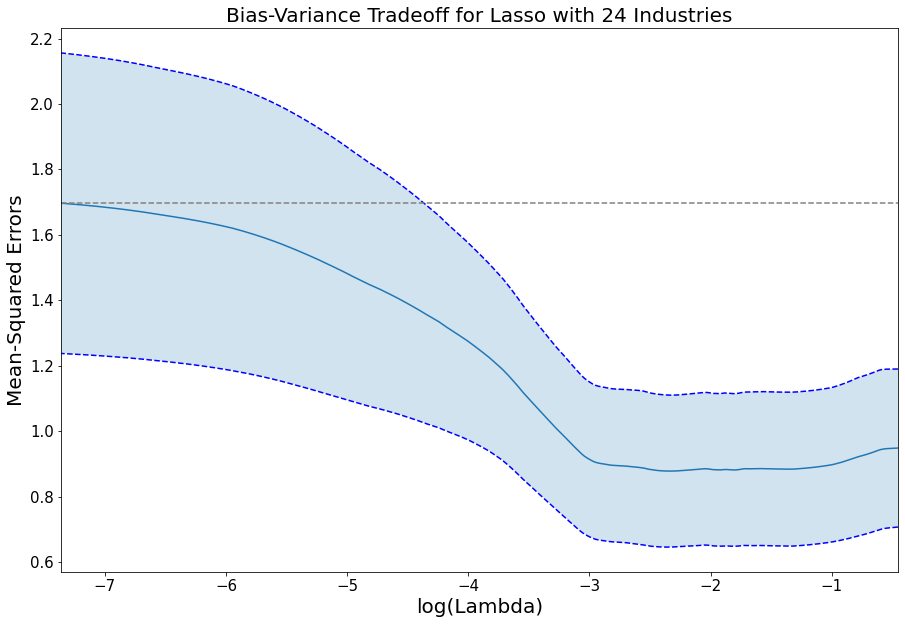

The industries are ['Beer', 'Cnstr', 'Toys', 'Gold', 'Fin', 'Fun', 'Soda', 'Ships', 'Comps', 'Chips', 'ElcEq', 'Paper', 'Other', 'Hlth', 'Hshld', 'LabEq', 'PerSv', 'Autos', 'Books', 'RlEst', 'Agric', 'Chems', 'Whlsl', 'Rtail']
The optimal log(lambda) is: -2.3485670403130614


In [11]:
lasso_result(24)

Mean train Variance: 0.25631560414219434
Test Variance: 0.5472974084271018
Test Mean: 0.03655968412670455 



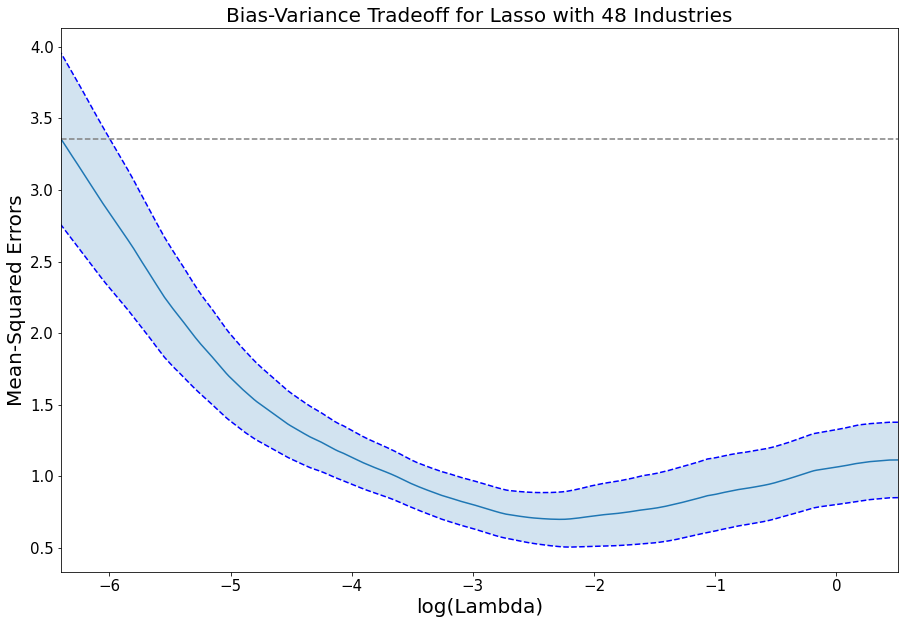

The industries are ['Beer', 'Cnstr', 'Toys', 'Gold', 'Fin', 'Fun', 'Soda', 'Ships', 'Comps', 'Chips', 'ElcEq', 'Paper', 'Other', 'Hlth', 'Hshld', 'LabEq', 'PerSv', 'Autos', 'Books', 'RlEst', 'Agric', 'Chems', 'Whlsl', 'Rtail', 'FabPr', 'Drugs', 'Guns', 'Mines', 'Trans', 'Rubbr', 'Boxes', 'Food', 'Telcm', 'Aero', 'Txtls', 'Insur', 'Mach', 'Smoke', 'Meals', 'Oil', 'Steel', 'Banks', 'MedEq', 'Util', 'BusSv', 'Clths', 'BldMt', 'Coal']
The optimal log(lambda) is: -2.287313409027577


In [12]:
lasso_result(48)

In [23]:
def rid_port(n):
    train_start_date = 24833 # datetime.date(2020,12,31)
    test_start_date = 24896 # datetime.date(2021,1,4)
    last_date = 25019 # datetime.date(2021,6,30)
    Ip = np.identity(n-1, dtype = None)
    w_EW = np.repeat(1/n,n)   
    minus_one_vector = np.array(np.repeat(-1, n-1))
    N = np.vstack([Ip, minus_one_vector])

    weights_array_ridge = []
    lambda1_array_ridge = []
    exp_return_array_ridge = []
    ts_MEAN = []
    ts_VAR = []
    MSE_PATH = []

    count = 0
    random.seed(113)
    samp_ind = random.sample(range(0,48), n) 


    while test_start_date <= last_date:

        df_train = df.iloc[train_start_date:test_start_date,samp_ind]  # Date end +1 because of python indexing rules        

        # Create N
        id_mat = np.identity(n-1)
        neg_1T = np.repeat(-1,n-1)
        N = np.vstack((id_mat,neg_1T))        

        # Create R
        R = df_train - df_train.mean() 

        # Create X and Y variables
        y_train = R.dot(w_EW)                       
        X_train = R.dot(N)


        alpha_space = np.logspace(-1,3,600)
        #Run RIDGECV
        ridge = RidgeCV(store_cv_values=True, fit_intercept = False,alphas=np.logspace(-1,3,600)) #i changed this range
        ridge.fit(X_train,y_train)
        lambda1_array_ridge.append(ridge.alpha_) #best lambda


        #transform beta to weights
        weights = w_EW - np.dot(N,ridge.coef_.reshape(-1,1))
        weights_array_ridge.append(weights)

        ts = np.dot(R, weights) #63 x 1
        ts_var = np.var(ts)
        ts_VAR.append(ts_var)

        MSE_PATH.append(ridge.cv_values_)


        # Create a df_test which starts from Jan 1st 2020
        df_test = df.iloc[test_start_date,samp_ind]

        # Create a returns list 

        returns = np.dot(df_test, weights )
        exp_return_array_ridge.append(returns)



        train_start_date += 1
        test_start_date += 1

      
    port_rid = df.iloc[test_start_date:,samp_ind]
    ind_list = port_rid.columns.tolist()
    date_index = port_rid.index.tolist()        
    print('List of {0} industries:'.format(n) + '\n' + str(port_rid.columns.tolist()),'\n')
    print('Ridge Regression for {0} industries:'.format(n) + '\n')
    print("Mean In-Sample Variance:", np.mean(ts_VAR))
    print("Out-of-Sample Variance:", np.var(exp_return_array_ridge))
    print("Out-of-Sample Mean:", np.mean(exp_return_array_ridge), '\n')        



    min_error = np.mean(MSE_PATH[0], axis = 0)
    std_errors = np.std(MSE_PATH[0], axis = 0)
    print(min_error.shape)
    print(std_errors.shape)


    def rid_plot(cv_scores, cv_scores_std):
        fig = plt.figure(figsize=(15,10))
        ax = fig.add_subplot(1,1,1)
        ax.plot(np.log(alpha_space), cv_scores)

        std_error = cv_scores_std / np.sqrt(10)
        
        plt.title("Bias-Variance Tradeoff for Ridge with {0} Industries".format(n),fontsize=20)
        
        plt.plot(np.log(alpha_space), cv_scores + std_error, 'b--')
        plt.plot(np.log(alpha_space), cv_scores - std_error, 'b--')

        
        ax.fill_between(np.log(alpha_space), cv_scores + std_error, cv_scores - std_error, alpha=0.2)
        ax.set_ylabel('Mean-Squared Errors', fontsize=20)
        ax.set_xlabel('log(Lambda)', fontsize=20)
        ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
        ax.set_xlim([np.log(alpha_space)[0], np.log(alpha_space)[-1]])
        ax.tick_params(axis='both', which='major', labelsize=15)
        plt.show()       
        
        
    rid_plot(min_error,std_errors)
    print("The optimal log(lambda) is:", np.log(alpha_space[np.argmin(min_error)]))
    


List of 6 industries:
['Food', 'Rtail', 'Cnstr', 'Other', 'Util', 'Chips'] 

Ridge Regression for 6 industries:

Mean In-Sample Variance: 0.47014539526413046
Out-of-Sample Variance: 0.5005384548230803
Out-of-Sample Mean: 0.08625316397239642 

(600,)
(600,)


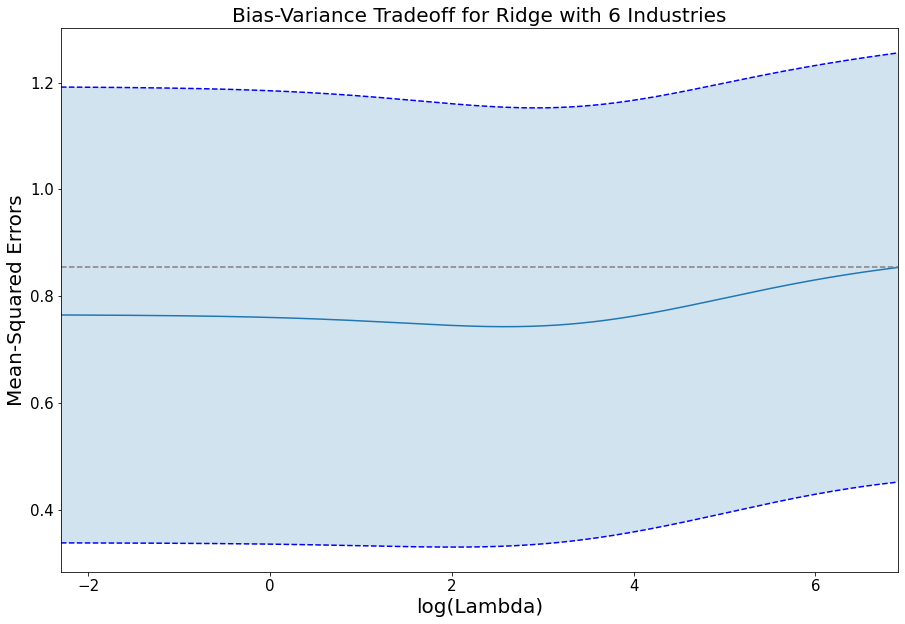

The optimal log(lambda) is: 2.587044687120188


In [24]:
rid_port(6)

List of 24 industries:
['Food', 'Rtail', 'Cnstr', 'Other', 'Util', 'Chips', 'Autos', 'Txtls', 'Mines', 'Insur', 'Smoke', 'FabPr', 'Hshld', 'LabEq', 'Telcm', 'Steel', 'Comps', 'Chems', 'Hlth', 'Drugs', 'Fun', 'Rubbr', 'Coal', 'Clths'] 

Ridge Regression for 24 industries:

Mean In-Sample Variance: 0.287459976546422
Out-of-Sample Variance: 0.5396910189489208
Out-of-Sample Mean: 0.05300055813530086 

(600,)
(600,)


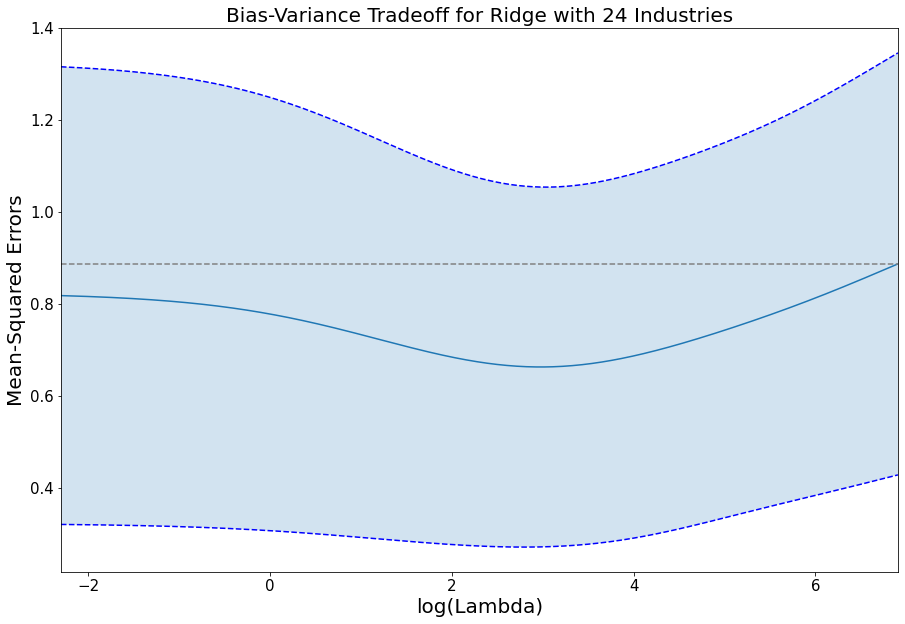

The optimal log(lambda) is: 2.9714495440474082


In [25]:
rid_port(24)

List of 48 industries:
['Food', 'Rtail', 'Cnstr', 'Other', 'Util', 'Chips', 'Autos', 'Txtls', 'Mines', 'Insur', 'Smoke', 'FabPr', 'Hshld', 'LabEq', 'Telcm', 'Steel', 'Comps', 'Chems', 'Hlth', 'Drugs', 'Fun', 'Rubbr', 'Coal', 'Clths', 'Aero', 'Boxes', 'BldMt', 'MedEq', 'Toys', 'Books', 'Meals', 'Whlsl', 'Gold', 'Soda', 'Paper', 'Trans', 'Oil', 'Banks', 'Beer', 'Ships', 'Agric', 'PerSv', 'RlEst', 'Fin', 'Guns', 'ElcEq', 'Mach', 'BusSv'] 

Ridge Regression for 48 industries:

Mean In-Sample Variance: 0.22460036226188343
Out-of-Sample Variance: 0.5376754154127839
Out-of-Sample Mean: 0.05051899082326281 

(600,)
(600,)


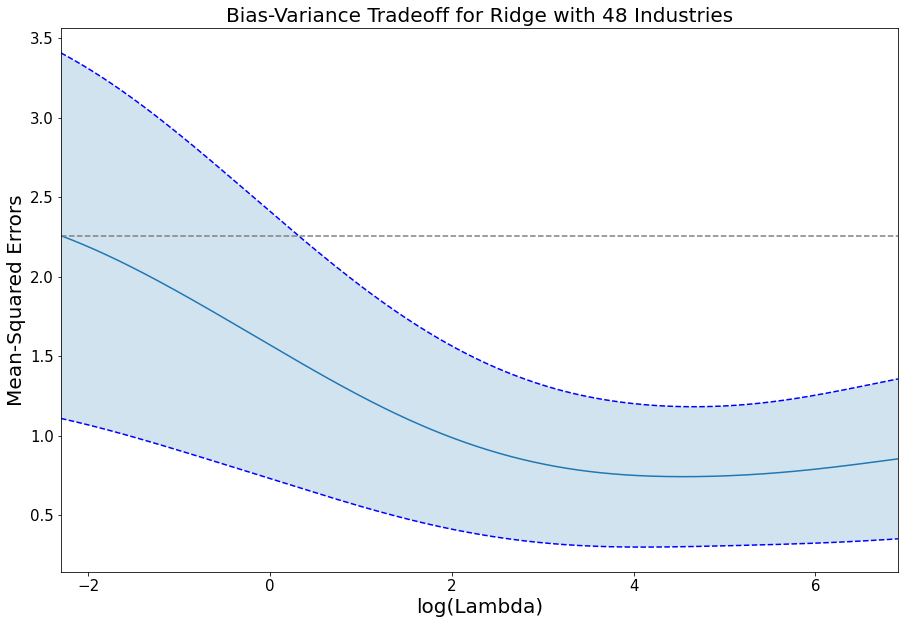

The optimal log(lambda) is: 4.539821360310464


In [26]:
rid_port(48)

In [30]:
# Using Linear Regression (OLS) - to see overfitting 

def portfolio_var(number):
    train_start_date = 24812 # datetime.date(2020,12,31)
    test_start_date = 24896 # datetime.date(2021,1,4)
    last_date = 25019 # datetime.date(2021,6,30)

    train_data_var = []
    test_data_return = []

    # Generate random sample to choose industries 
    random.seed(123)                 
    sample = random.sample(range(0, 48), number)

    while test_start_date <= last_date:
        training_data = df.iloc[train_start_date:test_start_date,sample]

        p = len(training_data.columns)
        W_ew = np.full(p,1/p).reshape(p,1)

        Identity_mat = np.identity(p-1)
        minus1T = np.negative(np.ones(p-1))
        N = np.vstack((Identity_mat,minus1T))

        R = training_data - training_data.mean()
        R.shape

        y = R.dot(W_ew) 
        X = R.dot(N) 

        reg = LinearRegression()
        reg.fit(X, y)

        betas = reg.coef_.reshape(-1,1)
        MinVar_Weight = W_ew - N.dot(betas)
        
        test_data = df.iloc[test_start_date,sample]
        MinVar_return = test_data.dot(MinVar_Weight)[0]
        test_data_return.append(MinVar_return) # Min Var return for each test data 

        R_array = R.to_numpy()
        train_data_returns = R_array.dot(MinVar_Weight)
        train_data_var.append((train_data_returns).var()) # Var over the past 63 observations

        train_start_date += 1
        test_start_date += 1

    df_test = df.iloc[24896:,sample]
    df_test['test_returns'] = test_data_return
    df_test['train_var'] = train_data_var

    test_variance = df_test.loc[:,"test_returns"].var() # test variance 
    train_variance = df_test.loc[:,"train_var"].mean() # mean train variance

    industries = training_data.columns.to_list()

    print(df_test.head())
    print("The number of industries:",number)
    print("The industries are", industries)
    print("The average train data variance is:", train_variance)
    print("The test data variance is:", test_variance)

In [53]:
portfolio_var(6)

            Beer  Cnstr  Toys  Gold   Fin   Fun  test_returns  train_var
Date                                                                    
2021-01-04 -2.28  -2.26 -2.97  5.41 -1.21 -3.55     -1.917095   1.014740
2021-01-05  0.39   0.06  2.91  0.58  0.55  0.83      0.745196   0.973586
2021-01-06 -0.28   2.89  0.45  2.54  4.00 -1.57      1.067830   0.923275
2021-01-07  0.29   2.85  5.99 -0.31  1.69  0.90      1.279437   0.924659
2021-01-08  0.95  -2.60  3.01 -4.48  0.35  0.44      1.123109   0.884530
The number of industries: 6
The industries are ['Beer', 'Cnstr', 'Toys', 'Gold', 'Fin', 'Fun']
The average train data variance is: 0.7710838670327289
The test data variance is: 0.8412589046336078


In [56]:
# LASSO - REBUILT
def lasso_alpha(number,a):
    train_start_date = 24833 # datetime.date(2020,12,31)
    test_start_date = 24896 # datetime.date(2021,1,4)
    last_date = 25019 # datetime.date(2021,6,30)
    wt_data = np.empty((0,number),int)
    W_ew = np.full(number,1/number).reshape(number,1)
    
    exp_return_array_lasso = []
    ts_VAR = []

    # Generate random sample to choose industries 
    random.seed(123)                 
    sample = random.sample(range(0, 48), number)





    

    while test_start_date <= last_date:

        training_data = df.iloc[train_start_date:test_start_date,sample] 

        # Create N
        Identity_mat = np.identity(number-1)
        minus1T = np.negative(np.ones(number-1))
        N = np.vstack((Identity_mat,minus1T))

        # Create R
        R_train = training_data - training_data.mean()

        # Create X and Y variables
        X_train = R_train.dot(N) # 63 x 6 . 6 x 5
        y_train = R_train.dot(W_ew) # 63 x 6 . 6 x 1

        #Lasso
        lasso = Lasso(alpha=a, normalize=False, fit_intercept = False)
        lasso.fit(X_train,y_train)

        #beta coef    
        betas = (lasso.coef_).reshape(-1,1)

        #weights
        weights = W_ew - (N.dot(betas))
        wt_data = np.vstack((wt_data, weights.reshape(1,-1)))
        
        #training set
        ts = np.dot(R_train, weights) #63 x 1
        ts_var = np.var(ts)
        ts_VAR.append(ts_var)
            

        #test set
        test_data = df.iloc[test_start_date,sample]

        #expected return array
        returns = (test_data.dot(weights))
        exp_return_array_lasso.append(returns[0])
            
        #loop
        train_start_date += 1
        test_start_date += 1

        #creating a DF to calculate mean and variance
        df_test = df.iloc[test_start_date:,sample]


    print("Mean train Variance:", np.mean(ts_VAR))
    print("Test Variance:", np.var(exp_return_array_lasso))
    print("Test Mean:", np.mean(exp_return_array_lasso), '\n')
    

In [57]:
lasso_alpha(6,1e-08)

Mean train Variance: 0.687149705406602
Test Variance: 0.8391725849494557
Test Mean: 0.08515896496794727 



In [58]:
# RIDGE - REBUILT
def ridge_alpha(number,b):
    train_start_date = 24833 # datetime.date(2020,12,31)
    test_start_date = 24896 # datetime.date(2021,1,4)
    last_date = 25019 # datetime.date(2021,6,30)
    wt_data = np.empty((0,number),int)
    W_ew = np.full(number,1/number).reshape(number,1)
    
    exp_return_array_ridge = []
    ts_VAR = []

    # Generate random sample to choose industries 
    random.seed(123)                 
    sample = random.sample(range(0, 48), number)



    

    while test_start_date <= last_date:

        training_data = df.iloc[train_start_date:test_start_date,sample] 

        # Create N
        Identity_mat = np.identity(number-1)
        minus1T = np.negative(np.ones(number-1))
        N = np.vstack((Identity_mat,minus1T))

        # Create R
        R_train = training_data - training_data.mean()

        # Create X and Y variables
        X_train = R_train.dot(N) # 63 x 6 . 6 x 5
        y_train = R_train.dot(W_ew) # 63 x 6 . 6 x 1

        #Lasso
        ridge = Ridge(alpha=b, normalize=False, fit_intercept = False)
        ridge.fit(X_train,y_train)

        #beta coef    
        betas = (ridge.coef_).reshape(-1,1)

        #weights
        weights = W_ew - (N.dot(betas))
        wt_data = np.vstack((wt_data, weights.reshape(1,-1)))
        
        #training set
        ts = np.dot(R_train, weights) #63 x 1
        ts_var = np.var(ts)
        ts_VAR.append(ts_var)
            

        #test set
        test_data = df.iloc[test_start_date,sample]

        #expected return array
        returns = (test_data.dot(weights))
        exp_return_array_ridge.append(returns[0])
            
        #loop
        train_start_date += 1
        test_start_date += 1

        #creating a DF to calculate mean and variance
        df_test = df.iloc[test_start_date:,sample]


    print("Mean train Variance:", np.mean(ts_VAR))
    print("Test Variance:", np.var(exp_return_array_ridge))
    print("Test Mean:", np.mean(exp_return_array_ridge), '\n')

In [59]:
ridge_alpha(6,3.6783797718286344)

Mean train Variance: 0.688156509173854
Test Variance: 0.8295773348428794
Test Mean: 0.08855615232638138 

